| |<font size="5">(Ridge) مصفوفة معالجة البيانات </font>|
|-:|-:|
|<img src="https://i.ibb.co/zrJz62y/Grid-Search.png" width=300></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4">  معالجة البيانات </font>| 
||<font size="4"> تصميم بنية معالجة متسلسلة </font>| 
||<font size="4">Ridge  تدريب البيانات </font>| 
||<font size="4"> تقويم أداء الخوارزمية </font>| 

In [ ]:
pwd

'/content'

In [ ]:
cd drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [ ]:
ls ./data/

Advertising.csv                       HousePrice3.csv
bst_features.csv                      HousePrice_4.csv
bst_target.csv                        housePrice_5.csv
california_housing_test.csv           HousePrice_5.csv
california_housing_train.csv          HousePrice.csv
data_1.csv                            kidney_disease.csv
data_cleaned.csv                      pandas_1.csv
df_merged.cvs                         pandas_2.csv
features_kept1.csv                    pandas_3.csv
features_selected.txt                 sales.csv
Google_Stock_Price_Test.textClipping  sales-funnel.xlsx
HousePrice1.csv                       wdbc.data
HousePrice2.csv                       weather.csv


In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/housePrice_5.csv", index_col=0)

In [ ]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,MiscVal,LotArea,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition,SalePrice
0,5,548,2566,196.0,0,854,706,856,0,8450,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,208500
1,31,460,2524,0.0,298,0,978,1262,0,9600,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal,181500
2,6,608,2706,162.0,0,866,486,920,0,11250,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,223500
3,36,642,2473,0.0,0,756,216,961,0,9550,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml,140000
4,8,836,3343,350.0,192,1053,655,1145,0,14260,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,250000


In [ ]:

df.shape

(1460, 31)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [ ]:
#  طيبعة البيانات  وعدد البيانات الناقصة
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1460 non-null   int64  
 1   GarageArea     1460 non-null   int64  
 2   TotalSF        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   WoodDeckSF     1460 non-null   int64  
 5   2ndFlrSF       1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   MiscVal        1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Street         1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  Utilities      1460 non-null   object 
 14  LotConfig      1460 non-null   object 
 15  Neighborhood   1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  BldgType

In [ ]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.select_dtypes("number").columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'SalePrice'],
      dtype='object')

In [ ]:
# التدقيق في احصائيات البينات للوقوف على التباين فيها إن وجد
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1460.0,22.950000,20.640653,-1.0,4.0,14.0,41.00,60.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
TotalSF,1460.0,2572.893151,823.598492,334.0,2014.0,2479.0,3008.50,11752.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.00,857.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0


- ضرورة اعادة توزيع البيانات خصوصا تلك التي تشهد تباينا كبير يظهر بالاساس في فارق القيم الصغرى والكبرى

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [ ]:

#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'MSZoning', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#  لن نقوم بحذف جميع القيم الناقصة ولكن سنعالجها  (  to carry on From here)
# df.dropna(inplace=True)


In [ ]:
df.shape

(1460, 31)

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [ ]:
X_train.shape

(978, 30)



## Ppeline  توظيف المعالجة المتسلسلة 


<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=500></img>

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:


from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  
  

num_pipeline= make_pipeline(
    SimpleImputer(strategy="mean" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    OneHotEncoder(handle_unknown="ignore", sparse=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
     )

In [ ]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train).shape

(978, 161)

In [ ]:

# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[ 1.15858999,  0.01333232, -0.71801762, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10616644, -2.27254222, -0.41623049, ...,  0.        ,
         0.        ,  1.        ],
       [-1.05798013,  1.6991648 ,  0.78126085, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.33518553,  0.45145827, -1.03429053, ...,  0.        ,
         1.        ,  0.        ],
       [-0.67248968, -1.24389868, -0.29792993, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00979383,  0.87053527,  0.41428769, ...,  0.        ,
         1.        ,  0.        ]])

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [ ]:


from sklearn.linear_model import Ridge
  
pipe_Ridge= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    Ridge()
)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# تدريب البيانات
pipe_Ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                      

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# قياس درجة  دقة  التنبؤ
f" Accurcary {pipe_Ridge.score(X_test, y_test):.3}"
#  الاصلي  alpha   باعتمدنا  هنا على   معيار   


' Accurcary 0.88'

In [ ]:
#pipeline  معايير  
list(pipe_Ridge.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'ridge',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__simpleimputer',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__simpleimputer__add_indicator',
 'columntransformer__pipeline-1__simpleimputer__copy',
 'columntransformer__pipeline-1__simpleimputer__fill_value',
 'columntransformer__pipeline-1__simpleimputer__missing_values',
 'columntransformer__pipeline-1__simpleimputer__strategy',
 'columntransformer__pipeline-1__simpleimputer__verbose',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntra

<img src="https://i.ibb.co/2vW8dtL/hyper-Parameters.png" width=300></img>

In [ ]:


param_grid = {
    'columntransformer__pipeline-1__simpleimputer__strategy': ['mean', 'median'], # التحقق ايهما أفضل
    'ridge__alpha': np.geomspace(0.001, 1000, 100, endpoint=True)   # [.001, 0.1, 1.0, 5, 10, 50, 100, 1000],

    }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # توزيع البيانات على أجزاء 5
gs = GridSearchCV(pipe_Ridge, param_grid, cv=kf, verbose=3, n_jobs=-1 , scoring="r2" ) # البحث عن أفضل المعايير 

In [ ]:

gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 994 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   37.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                  

In [ ]:
#  قائمة أفضل المعاييير
gs.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                      

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gs.best_params_ 

{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'ridge__alpha': 8.697490026177835}

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
gs.best_estimator_.score(X_test, y_test)

0.8688679632267828

In [ ]:
#Alpha التاكد من أفضل قيم   
from sklearn.model_selection import validation_curve
alphas= np.geomspace(0.001, 1000, 100, endpoint=True)
train_scores, test_scores = validation_curve(estimator=pipe_Ridge, 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="ridge__alpha" ,
                                              param_range=alphas, 
                                              cv=10
 )

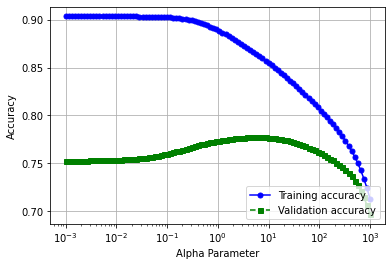

In [ ]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(alphas, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(alphas, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
# GridSearchCV عرض وضائف  
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_columntransformer__pipeline-1__simpleimputer__strategy', 'param_ridge__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# عرض متوسط قيم دقة  كل خاصية 
gs.cv_results_['mean_test_score']

array([0.74422416, 0.74424651, 0.74427218, 0.74430165, 0.74433548,
       0.74437431, 0.74441886, 0.74446995, 0.74452854, 0.74459568,
       0.7446726 , 0.74476067, 0.74486144, 0.74497666, 0.7451083 ,
       0.74525857, 0.74542991, 0.74562504, 0.74584697, 0.74609898,
       0.74638465, 0.74670781, 0.74707256, 0.74748319, 0.74794413,
       0.74845986, 0.74903478, 0.74967306, 0.75037844, 0.75115401,
       0.75200197, 0.75292333, 0.75391764, 0.75498273, 0.75611448,
       0.75730668, 0.758551  , 0.75983708, 0.76115286, 0.76248498,
       0.76381945, 0.76514236, 0.76644072, 0.76770323, 0.76892091,
       0.77008759, 0.77120003, 0.77225775, 0.77326261, 0.7742181 ,
       0.77512847, 0.77599791, 0.77682974, 0.77762578, 0.77838604,
       0.77910857, 0.77978961, 0.78042387, 0.781005  , 0.78152601,
       0.78197975, 0.78235923, 0.78265786, 0.78286962, 0.7829891 ,
       0.7830115 , 0.78293259, 0.78274872, 0.78245682, 0.7820545 ,
       0.78154011, 0.78091289, 0.78017305, 0.77932187, 0.77836

In [ ]:
# التنبؤ
y_pred=gs.predict(X_test)

In [ ]:
# تقويم  نموذج الانحدار الخطي
from sklearn import  metrics
print(f" MAE : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE : {metrics.mean_squared_error(y_test, y_pred)}")
print(f" RMSE : {np.sqrt(metrics.r2_score(y_test, y_pred)):.3}")
print(f" R^2 : {metrics.r2_score(y_test, y_pred)}")
print(f" Expalined Variance Score : {metrics.explained_variance_score(y_test, y_pred)}")

 MAE : 0.102
 MSE : 0.022348724346828087
 RMSE : 0.932
 R^2 : 0.8688679632267828
 Expalined Variance Score : 0.8689211374910348


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


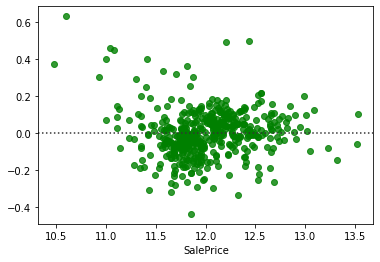

In [ ]:
# Residuals    عرض تخطيط تشتت البواقي
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
_=sns.residplot(y_test,y_pred, color='green')

In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي 
pd.DataFrame({"Predicted":y_pred, "Actual Price": y_test}).sample(6, random_state=10)

,Predicted,Actual Price
506,12.216553,12.278398
425,11.710757,11.813037
1013,11.681491,11.350418
410,11.599526,11.002117
548,11.662885,11.736077
620,11.316229,11.112463


In [ ]:
pip install scikit-plot

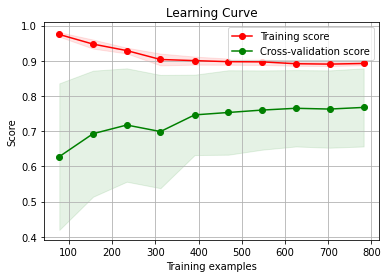

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(pipe_Ridge, 
                                     X_train, y_train, 
                                     scoring="r2",  
                                     train_sizes=np.linspace(.1, 1.0, 10) ,  
                                     ) # neg_mean_absolute_error"